<a href="https://colab.research.google.com/github/rangelokk/Diplom/blob/main/Version_archive/Version_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error,
from sklearn.linear_model import SGDClassifier

## Геля

Доп. данные. Путь к изображению, классы, возраст, пол и тд.

In [ ]:
# Download latest version
path = kagglehub.dataset_download("kmader/skin-cancer-mnist-ham10000")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/kmader/skin-cancer-mnist-ham10000/versions/2


In [ ]:
data = pd.read_csv(path + "/HAM10000_metadata.csv")
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
data1 = data.drop('lesion_id', axis=1)
data1 = data1.drop('image_id', axis=1)
data1 = data1.drop('dx', axis=1)
data1 = data1.drop('age', axis=1)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
data_new = ohe.fit_transform(data1.values)
columns = ohe.get_feature_names_out(input_features=data1.columns)
data_encoded = pd.DataFrame(data_new, columns=columns)
data_encoded.head()

,dx_type_confocal,dx_type_consensus,dx_type_follow_up,dx_type_histo,sex_female,sex_male,sex_unknown,localization_abdomen,localization_acral,localization_back,...,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Чб изображения 28*28 и метки

In [ ]:
image_data1  = pd.read_csv(path + "/hmnist_28_28_L.csv")
image_data1.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label
0,169,171,170,177,181,182,181,185,194,192,...,184,186,185,180,157,140,140,159,165,2
1,19,57,105,140,149,148,144,155,170,170,...,172,175,160,144,114,89,47,18,18,2
2,155,163,161,167,167,172,155,152,165,175,...,163,178,157,166,167,148,141,136,115,2
3,25,71,116,139,136,153,148,161,172,162,...,125,135,138,137,111,71,32,16,16,2
4,129,162,181,196,205,208,205,213,225,224,...,210,197,172,190,195,193,181,147,88,2


Цветные изображения 28*28 и метки

In [ ]:
image_data_rgb  = pd.read_csv(path + "/hmnist_28_28_RGB.csv")
image_data_rgb

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0


In [ ]:
import keras
from keras.utils import to_categorical
#Преобразовать столбец данных с изображениями в массив numpy
X = image_data_rgb.drop('label', axis=1)
X = X/255.  # Масштабировать значения до 0-1. Вы также можете использовать standardscaler или другие методы масштабирования.
Y=image_data_rgb['label']
X = pd.concat([X, data_encoded, data["age"] / 85], axis=1)
##Y_cat = to_categorical(Y, num_classes=7) #Преобразовать в категориальный, поскольку это проблема многоклассовой классификации
#Разделение на обучение(train) и тестирование(test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
Y_train

,label
5660,4
5268,4
9291,4
1075,2
9271,4
...,...
5734,4
5191,4
5390,4
860,2


In [ ]:
X_train

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity,age
5660,0.968627,0.658824,0.694118,0.968627,0.674510,0.709804,0.968627,0.670588,0.705882,0.968627,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.352941
5268,0.882353,0.545098,0.600000,0.882353,0.529412,0.607843,0.878431,0.525490,0.603922,0.905882,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.529412
9291,0.717647,0.584314,0.549020,0.733333,0.611765,0.611765,0.733333,0.607843,0.588235,0.725490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.588235
1075,0.862745,0.725490,0.752941,0.878431,0.741176,0.768627,0.894118,0.752941,0.784314,0.898039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.529412
9271,0.674510,0.384314,0.403922,0.741176,0.450980,0.501961,0.772549,0.478431,0.525490,0.776471,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.705882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.862745,0.513725,0.658824,0.866667,0.505882,0.658824,0.882353,0.529412,0.678431,0.894118,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.588235
5191,0.894118,0.556863,0.647059,0.913725,0.580392,0.674510,0.917647,0.592157,0.686275,0.921569,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.529412
5390,0.847059,0.505882,0.556863,0.850980,0.501961,0.556863,0.847059,0.498039,0.564706,0.839216,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.529412
860,0.105882,0.054902,0.062745,0.109804,0.054902,0.062745,0.086275,0.043137,0.050980,0.109804,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.647059


## Лиза

❗ Запустить блок "Геля" перед обучением модели!

### Модель OVO, не работает!

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(X_train, Y_train)

In [ ]:
val_probs = ovo_clf.predict_proba(X_test)[:, 1]
roc_auc_score(Y_test, val_probs)

AttributeError: 'OneVsOneClassifier' object has no attribute 'predict_proba'

AttributeError: 'OneVsOneClassifier' object has no attribute 'predict_proba'

### Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
model = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(model, X_train, Y_train, cv=3,
                                    method="predict_proba")

In [ ]:
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
val_probs = model.predict_proba(X_test)
roc_auc = roc_auc_score(Y_test, val_probs, multi_class='ovr')
print(roc_auc)

0.7968964178301354


###Добавляю оценки (Лиза)

In [ ]:
print("Пробую")

Пробую


In [21]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7112619808306709


In [ ]:
precision = precision_score(Y_test, y_pred, average='weighted')
print(f"Precision: {precision}")

Precision: 0.6682612096106151


In [ ]:
recall = recall_score(Y_test, y_pred, average='weighted')
print(f"Recall: {recall}")

Recall: 0.7112619808306709


In [ ]:
f1_score = f1_score(Y_test, y_pred, average='weighted')
print(f"F1_score: {f1_score}")

F1_score: 0.6742090716983875


In [ ]:
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error [MSE]: {mse}")

Mean Squared Error [MSE]: 1.8674121405750799


In [ ]:
mae = mean_absolute_error(Y_test, y_pred)
print(f"Mean Absolute Error [MAE]: {mae}")

Mean Absolute Error [MAE]: 0.6717252396166135


###Матрица неточностей (Лиза)

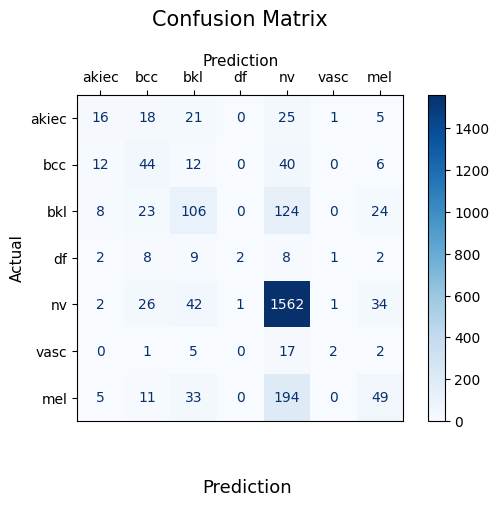

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

class_names = ['akiec','bcc','bkl','df','nv','vasc','mel']

cm = confusion_matrix(Y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix', fontsize=15, pad=20)
plt.xlabel('Prediction', fontsize=11)
plt.ylabel('Actual', fontsize=11)
#Customizations
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)

plt.show()

## Катя

Здесь будут примеры работы классификатора с процентами. Просьба запустить предыдущие блоки

4 - nv  
3 - df  
5 - vasc  
0 - akiec  
1 - bcc  
6 - mel  
2 - bkl  

In [ ]:
# закидываем названий классов
class_names = {
    0: 'akiec',
    1: 'bcc',
    2: 'bkl',
    3: 'df',
    4: 'nv',
    5: 'vasc',
    6: 'mel'
}

#ТЕСТ
index = np.random.randint(len(X_test))  # предсказание для ОДНОГО случайного индекс из тестового набора
#sample = X_test[index].reshape(1, -1) не работает ошибка
sample = X_test.iloc[index].values.reshape(1, -1)  #доступ к строкам
sample_prob = model.predict_proba(sample)  #вероятности диагнозов в массиве

# Итоговый вывод
for i, prob in enumerate(sample_prob[0]):
    print(f"{class_names[i]}: {prob*100:.2f}%")
predicted_class = np.argmax(sample_prob)
print(f"Для {index} возможный диагноз: {class_names[predicted_class]}")

akiec: 0.00%
bcc: 0.00%
bkl: 0.00%
df: 0.00%
nv: 80.00%
vasc: 0.00%
mel: 20.00%
Для 2173 возможный диагноз: nv


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


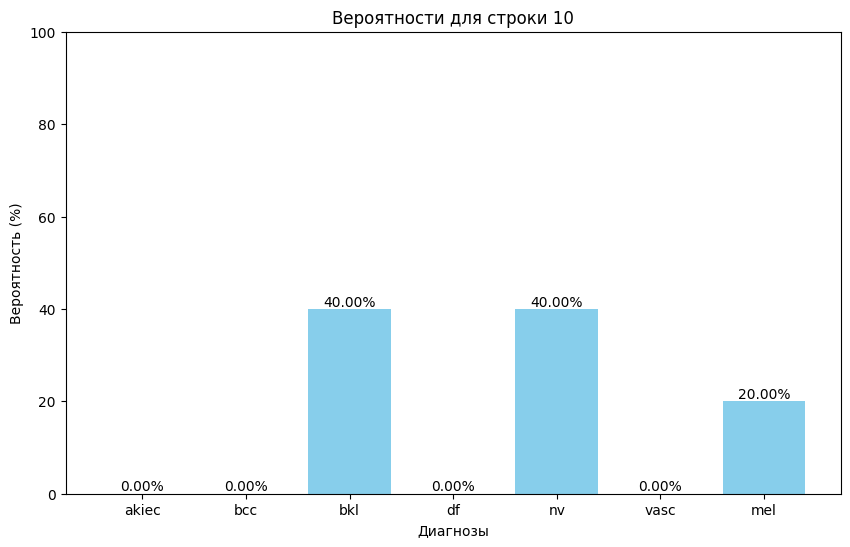

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(class_names.values(), sample_prob[0] * 100, color='skyblue')
plt.xlabel('Диагнозы')
plt.ylabel('Вероятность (%)')
plt.title(f'Вероятности для строки {index}')
plt.ylim(0, 100)
for i, prob in enumerate(sample_prob[0]):
    plt.text(i, prob * 100, f"{prob*100:.2f}%", ha='center', va='bottom')
plt.show()

In [ ]:
#Если известен индекс изображения, для которого нужен диагноз
index = int(input('Введите номер индекса: '))
sample = X_test.iloc[index].values.reshape(1, -1)  #доступ к строкам
sample_prob = model.predict_proba(sample)  #вероятности диагнозов в массиве

# Итоговый вывод
for i, prob in enumerate(sample_prob[0]):
    print(f"{class_names[i]}: {prob*100:.2f}%")
predicted_class = np.argmax(sample_prob)
print(f"Для {index} возможный диагноз: {class_names[predicted_class]}")

Введите номер индекса: 10
akiec: 0.00%
bcc: 0.00%
bkl: 40.00%
df: 0.00%
nv: 40.00%
vasc: 0.00%
mel: 20.00%
Для 10 возможный диагноз: bkl


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#Тут пипец, оч много
for index in range(len(X_test)):
    sample = X_test.iloc[index].values.reshape(1, -1)  # предсказание для ВСЕХ строк из тестового набора
    sample_prob = model.predict_proba(sample)

    print(f"\nСтрока {index}:")
    for i, prob in enumerate(sample_prob[0]):
        print(f"{class_names[i]}: {prob*100:.2f}%")

    predicted_class = np.argmax(sample_prob)
    print(f"Диагноз: {class_names[predicted_class]}")